In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [3]:
pwd 

'C:\\Users\\mondi'

In [4]:
#Making the dataframe easier to understand the relashionship columns-rows
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 130)

# <span style='background:yellow'> Introduction of Project </span>

<span style='color:green'> **In this project we have to analyze the table with data of an estate agency. That is going to happen by investigating property price within 3 different Towns/Villages in a local area. We will also analyze Number Of Rooms of the properties, Age of Property, Distance to the closesest Town Centre and how much Tax has the property to pay every Year.** </span>

---
---

#### <span style='color:green'> Here you will find the 5 first rows of the table. This is for yourself to have an insight of the table and data we are analyzing. </span>
#### <span style='color:green'> As we can see there are 7 different columns that means 7 different criterias and subjects to analyze per property. 
According to the table the 7 different columns are :</span>
>Town/Village
>>Number of Rooms
>>>Age of Property
>>>Distance to the Nearest Town Centre
>>>>Property Tax per year
>>>>>Number of pupils per teacher
>>>>>>Property Price

---

---

---

## ***Below you an see the full table with the full data rows.***

In [5]:
#uploading with pandas the dataframe 
data = pd.read_csv(r"C:\Users\mondi\Downloads\3932585.csv")
print(data)

        TOWN/VILLAGE  No. Rooms  Age of Property  Distance to Nearest Town Centre  Property Tax per year  \
0     Boston Roxbury          5              100                             1.66                 466.20   
1     Boston Roxbury          6              100                             1.83                 479.52   
2     Boston Roxbury          7               91                             1.82                 499.50   
3     Boston Roxbury          5               89                             1.65                 692.64   
4     Boston Roxbury          6              100                             1.80                 586.08   
5     Boston Roxbury          7               77                             1.79                 559.44   
6     Boston Roxbury          6              100                             1.86                1112.22   
7        Boston west          6               95                             1.87                 945.72   
8        Boston west        

In [6]:
#Making my table more clear columns and rows.Printing 5 first rows 
data.head(5)

,TOWN/VILLAGE,No. Rooms,Age of Property,Distance to Nearest Town Centre,Property Tax per year,No. pupils per teacher,Property Price
0,Boston Roxbury,5,100,1.66,466.20,20,7000
1,Boston Roxbury,6,100,1.83,479.52,20,7200
2,Boston Roxbury,7,91,1.82,499.50,20,7500
3,Boston Roxbury,5,89,1.65,692.64,20,10400
4,Boston Roxbury,6,100,1.80,586.08,20,8800


In [7]:
#Checking for Nulls and Datatype of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   TOWN/VILLAGE                     21 non-null     object 
 1   No. Rooms                        21 non-null     int64  
 2   Age of Property                  21 non-null     int64  
 3   Distance to Nearest Town Centre  21 non-null     float64
 4   Property Tax per year            21 non-null     float64
 5   No. pupils per teacher           21 non-null     int64  
 6   Property Price                   21 non-null     int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 1.3+ KB


---

---

---

### <span style='color:green'>  It is very important before we start with visualization of graphs to understand the data we are going to work with. Also, is alwas a good start if we firstly try to find the mean, mode and the distinct/unique count of the each different column, specially in this data we nee to find out with how many different Towns/Villages we have to do with. Additionally, we have to find the range of our numbers in the data that we possess, that means the minimum number and the maximum number. 
### <span style='color:Blue'>You will find all those statistic numbers in the below table.</span> 

In [8]:
#Statistics of table to have an general insight
data.describe()

,No. Rooms,Age of Property,Distance to Nearest Town Centre,Property Tax per year,No. pupils per teacher,Property Price
count,21.000000,21.000000,21.000000,21.000000,21.0,21.000000
mean,5.904762,88.476190,1.866667,780.171429,20.0,11714.285714
std,0.700340,11.404469,0.217769,237.858855,0.0,3571.454286
min,4.000000,60.000000,1.140000,466.200000,20.0,7000.000000
25%,6.000000,79.000000,1.800000,586.080000,20.0,8800.000000
50%,6.000000,91.000000,1.870000,732.600000,20.0,11000.000000
75%,6.000000,99.000000,2.000000,939.060000,20.0,14100.000000
max,7.000000,100.000000,2.200000,1385.280000,20.0,20800.000000


In [9]:
#In describe there is no mode
#We would like to know the mode of No.Rooms and Age of Property
data.mode()['No. Rooms'][0]


6.0

In [10]:
data.mode()['Age of Property'][0]

100.0

In [11]:
#Count Distinct towns/villages 
data['TOWN/VILLAGE'].nunique()

3

## <span style='color:black'> Different Towns/Villages in this data: <span style='color:red'>3 </span>
| Town/Village | How many of this town in this data | 
| :---: | :---: | 
| <span style= 'background:yellow'>Boston North End </span> | 7 | 
| <span style= 'background:yellow'>Boston West </span>| 7 |
| <span style= 'background:yellow'>Boston Roxbury </span>| 7 |

In [12]:
#How many properties from each town/village
data['TOWN/VILLAGE'].value_counts()

Boston west         7
Boston Roxbury      7
Boston North End    7
Name: TOWN/VILLAGE, dtype: int64

---

---

---

## After checking the table as much as we could using some functions, now is the time for <span style='color:red'>data vizualization </span>. This data table may looks complicated because all we can see is lists of numbers in each column, so we need to create some charts, analyze the data and compare these 7 different given subjects/columns.

In [13]:
#Setting chart, x, y, title size bigger 
sns.set(rc={'figure.figsize':(12,7)})
sns.set_context("paper", rc={"font.size":8,"axes.titlesize":15,"axes.labelsize":15})   

# <span style='background :pink' >Sums of Prices for the 3 different Towns/Villages. </span>

### <span style='color:blue'>**With this bar chart we are looking which of the 3 Towns/Villages has the most and less expensive Property Prices and whats the difference if we compare the 3 of them.** </span>

[Text(0.5, 1.0, '7 Prices for each Town/Village Property Prices Summarized ')]

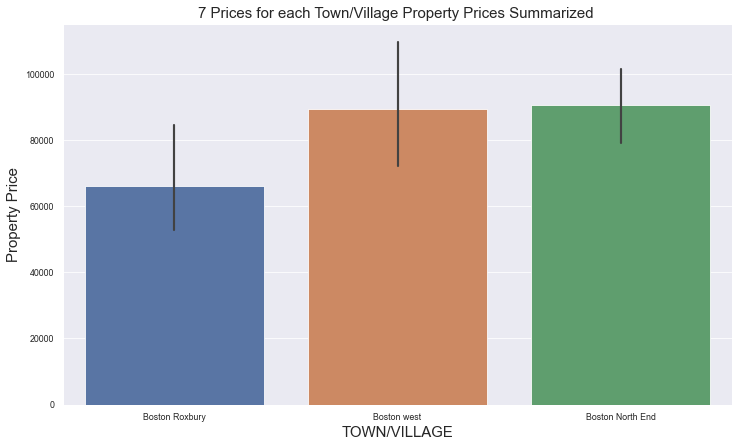

In [14]:
sns.barplot(data=data, x="TOWN/VILLAGE", y="Property Price", estimator=np.sum).set(title="7 Prices for each Town/Village Property Prices Summarized ")

### <span style='color:red'>According to this bar chart sums of prices of properties for: </span>
    1. Boston Roxbury are 66k
    2. Bonston West are 89.5k
    3. Boston North End are 90.5k

### <span style='color:blue'>We conclude that Boston West comparing with Boston North End more or less they have same Property Prices. However, if we can see that Boston West and North End have approximately 32% higher price than Boston Roxbury Property Prices. That might happen because Boston Roxbury Properties have less Number of Rooms, they might be further from a Town Centre or they might be more Aged Properties. We will discover below why Boston Roxbury has cheaper Property Prices.

---


---

---

# <span style='background :pink' >Average Price by No. Rooms </span>

### <span style='color :blue'> In the bar chart we will have a look how much is the Average Price of the property with No. Rooms. The range of the No. Rooms is :  <span style='color: red'> 4-7

[Text(0.5, 1.0, 'Averge Price by Rooms')]

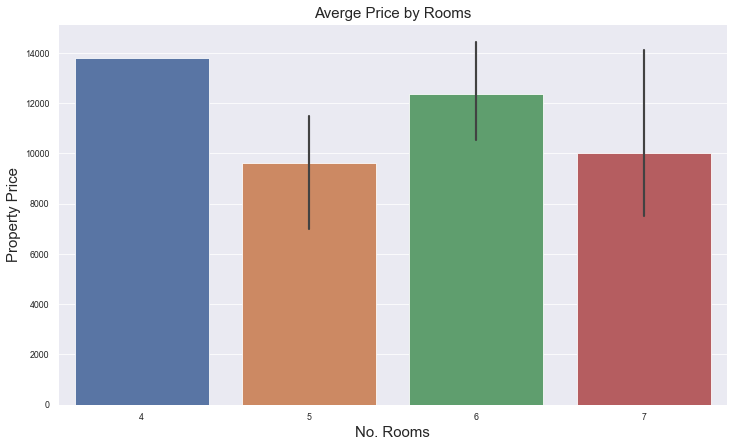

In [15]:
sns.barplot(data = data, x = 'No. Rooms', y = 'Property Price').set(title='Averge Price by Rooms')

### <span style='color :red' >In the Bars with No. Rooms 5,6,7 there is a vertical line. This is the range of the price for the specific No. Rooms. For example Price range for 5 Rooms approximately is :  <span style='color:black'> min: 7k | max: 11.8k </span>

### <span style='color: blue' >When we firstly see this chart, we can tell that must be an error. </span>
### <span style='color: red' >How can the Properties with less rooms cost more? </span>
### <span style='color: blue' >That can happen only if these Properties meet some of these criterias: </span>
    1. Very close to a Town Centre
    2. New building - Not Aged
    3. The No. pupils per teacher are much more 
### <span style='color: blue' >We had a deeper research in the data table and we notice that there is only 1 Property with 4 Rooms, the distance to the nearest Town Centre is good comparing to the other properties but is one of the most Aged properties.</span> 
### <span style='color:black'>That is an outliner!

---

---

---

# <span style='background :pink' >Property Prices by Town/Village

### <span style='color: blue' >In this line-plot graph we can see the 7 different Property prices for each of the 3 different Towns/Villages. 

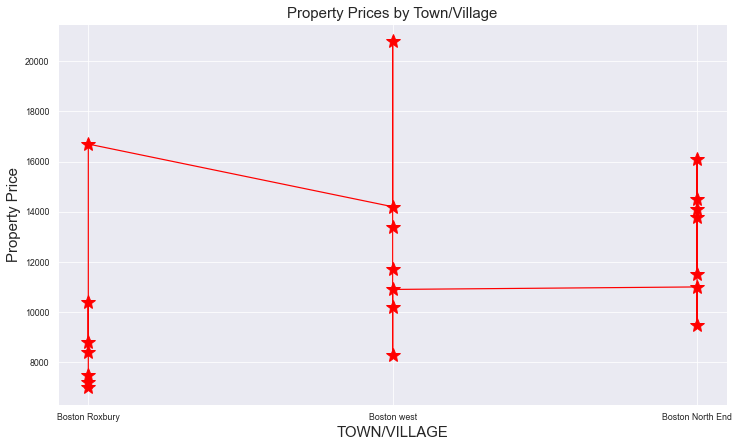

In [16]:
plt.plot(data['TOWN/VILLAGE'], data['Property Price'], color='red', marker='*', markersize=15)
plt.title('Property Prices by Town/Village')
plt.xlabel('TOWN/VILLAGE')
plt.ylabel('Property Price')
plt.show()

### <span style='color: red' >According to the chart we can notice that the most of Boston Roxbury Properties cost around 8k, most of the Boston West Properties cost around 12k and the average for the Boston North End cost around 13.5k. 

### <span style='color :blue' > If we have a better look we can also notice that the maximum range of the Property price is 16.7k because of only 1 property, all the rest Properties prices of this area are below 11k (min 7k). 

### <span style='color: blue' > Same for Boston West area as well. All the prices for the properties are 14.2k and bellow (min 8.1k) but there is one Property that increases a lot the average of the Boston West area Price because this property costs 20.8k.

### <span style='color: black' >Those 2 Properties are </spank> <span style='color: red'>outliners!</span> <span style='color:black'> They might have: </span>
1. Aged building < Average Age building
2. No. Rooms > Average No. Rooms
3. Less distance to Nearest Town Centre Than the Average Properties.

---


---

---

# <span style='background :pink' >Property Age Range & Price of Property

### <span style='color: blue' > In this Colorful BarChart we can see the Prices of properties comparing to the Age of the property. </span>
### <span style='color: black' > For the properties with Age 95 & 100 we can see that there are more than 1 properties and the the range for properties with <span style='color: red' > Age 95 years is approximately 8.5k - 14k & for Age 100 years is 7.5k - 13.5k.

[Text(0.5, 1.0, 'Age of Property & Price')]

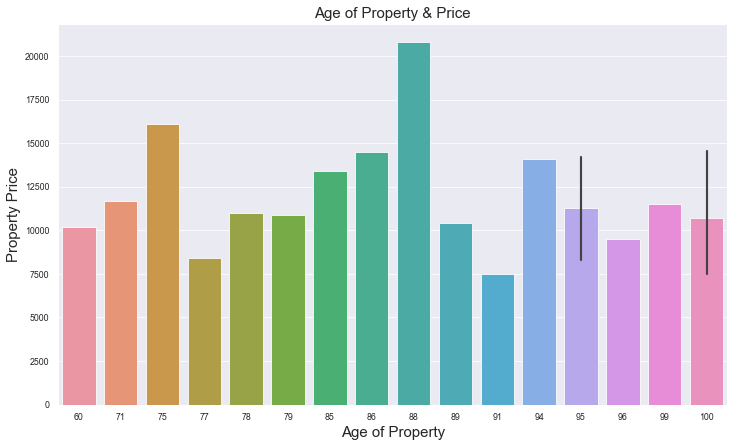

In [17]:
#The Vertical line on Age 95 and 100 means that there are more than 1 in this Range
sns.barplot(data = data, x='Age of Property', y='Property Price').set(title="Age of Property & Price")

### <span style='color: blue' > We can also distinguish the highest price and the lowest price how many years buildings they are. </span>
### <span style='color: black' > Maximum Price Property: </span> <span style='color: red' > 20.8k                   </span>
### <span style='color: black' > Minimum Price Property: </span> <span style='color: red' > 7.5k

---

---

---

# <span style='background :pink' >Property Price & Property Tax per year

### <span style='color: blue' > The next chart is called Scatter Plot. In this chart we can see the Property Tax per Year increasing as long as the Property cost is more. Which it makes sense, as much more expensive house, the higher tax you have to pay.

[Text(0.5, 1.0, 'Property Price and Tax per year')]

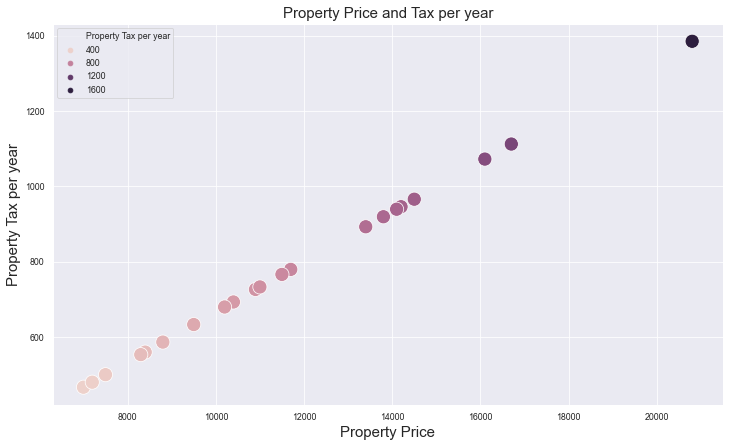

In [18]:
#Seaborn scatterplot chart
sns.scatterplot(data=data, x='Property Price', y='Property Tax per year', s=200, hue='Property Tax per year').set(title='Property Price and Tax per year')

### <span style='color : blue' >The range of the Tax per year of the Properties is from 500 - 1.4k. For almost all of them the Tax per year is < 1k except 3 of the properties. From those that the Tax per year is > </span> <span style='color:red'>1k, 2 of them the tax is around 1.1k and of the 3rd manipulates the average of the Tax per year of the properties because is much higher than all the rest, the Tax it is 1.4k per year

---

---

---

# <span style = 'background:pink'> Price of Property & Distance to the closest Town Centre

### <span style= 'color:blue'> According to this Scatter Chart, the dots can show us how far is the Property from the Nearest Town Centre and the Price of each Property. </span>
### As we can see, to the 20 out of 21 of the Properties, the Closest Town Centre is between 1.6km - 2.2km.
### However, <span style= 'color: red'>there is one unexpected Property that the Price of this Property is close to the Average Price of all Properties and the Distance to the nearest Town Centre is less than 1.2km. </span>
### This Property, either should be very old or should have less rooms than the others, otherwise <span style='color:red'> the price for this property is very LOW! </span>
### This Property will be more analyzed  below

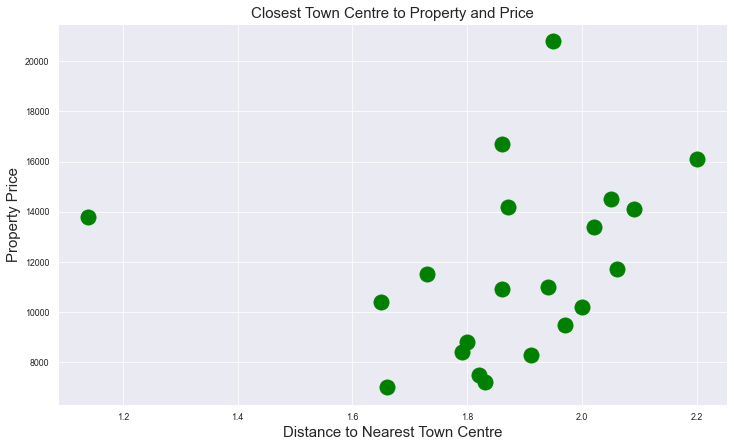

In [19]:
#Matplotlib scatter chart
plt.scatter(data['Distance to Nearest Town Centre'], data['Property Price'], color = 'green', s=230)
plt.title('Closest Town Centre to Property and Price')
plt.xlabel('Distance to Nearest Town Centre')
plt.ylabel('Property Price')
plt.show()

---

---

---

## <span style='color:blue'> In the next 3 diagrams we will see again more details the Property Prices & Distance of each Property from the closest Town Centre. The price and the distance of each property is very important so we've created some extra charts here like line chart, bar chart and combination of both of them to have a better insight.

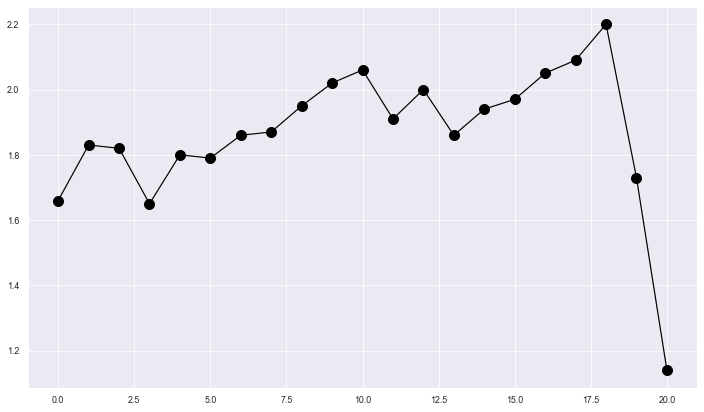

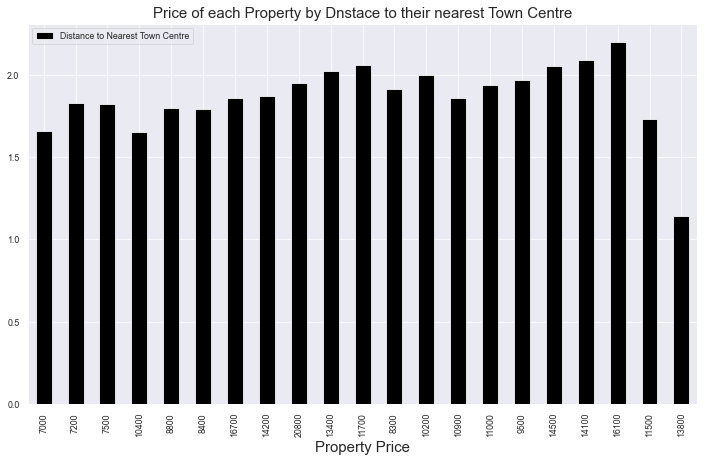

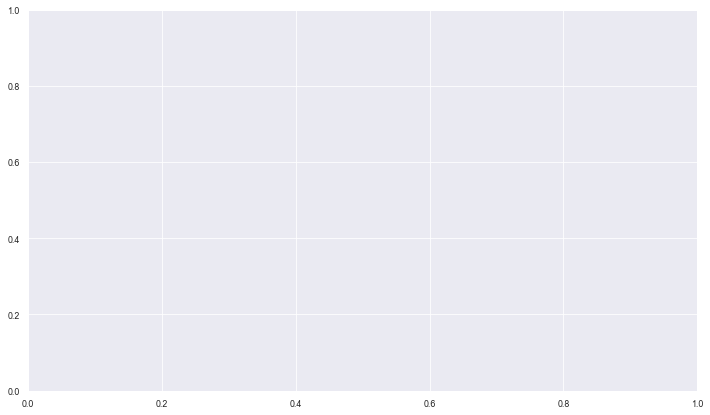

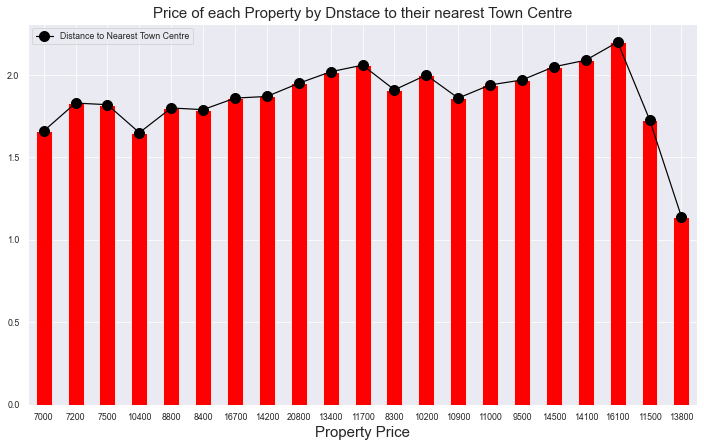

In [20]:
#Distance by 21 different data
data['Distance to Nearest Town Centre'].plot(kind='line', marker='o', color='black', ms=10)


#Adding the price to the above graph and converting it to Barchart
data.plot(x='Property Price', y='Distance to Nearest Town Centre', kind='bar', color='black', title='Price of each Property by Dnstace to their nearest Town Centre')

#Combining both charts in one for an better insight
fig, ax = plt.subplots()
data.plot(x='Property Price', y='Distance to Nearest Town Centre', kind='bar', color='red', title='Price of each Property by Dnstace to their nearest Town Centre')
data['Distance to Nearest Town Centre'].plot(kind='line', marker='o', color='black', ms=10)



---

---

---

# <span style='background:pink'>Graph #1. No. Rooms, Price & Distance of Each Property

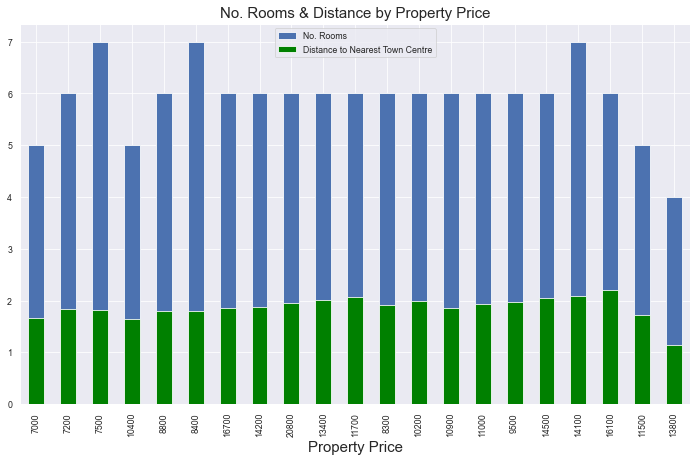

In [21]:
ax = data.plot(x="Property Price", y="No. Rooms", kind="bar", title='No. Rooms & Distance by Property Price')
data.plot(x="Property Price", y="Distance to Nearest Town Centre", kind="bar", ax=ax, color="green")

### <span style='color : blue'> Now is time to analyze more than 2 criterias per property so we can start making a conclusion about each property. This is a very clear bar chart to visualize if any of the properties has </span>  overestimated or understimated price.
### According to this BarChart, we will compare each property with the average of:
* No. Rooms                       --> 5.9 (6)
* Distance to closest Town Centre --> 1.86
* Price of Property               --> 11714.29

### Each property:
|Property|No. Rooms|Distance|Price|<span style='background:yellow'>Comparing AVGs by Property number </span>|<span style='background:yellow'>LOW, HIGH or Well Estimated  Estimation of Price (Without Considering the Age of building)|
|---|---|---|---|---|---|
|1|5|1.66 |7000|<span style='color:blue'>Avg Rooms  > 1 /// Avg Distance > 1 /// 1 - </span> <span style='color:red'>Avg Price = -4714.29| </span> <span style='background:orange'> LOW|
|2|6|1.83 |7200|<span style='color:blue'>Avg Rooms  = 2 /// Avg Distance > 2 /// 2 - </span> <span style='color:red'>Avg Price = -4514.29| </span> <span style='background:red'> VERY LOW|
|3|7|1.82 |7500|<span style='color:blue'>Avg Rooms  < 3 /// Avg Distance > 3 /// 3 - </span> <span style='color:red'>Avg Price = -4214.29| </span> <span style='background:red'> VERY LOW|
|4|5|1.65 |10400|<span style='color:blue'>Avg Rooms > 4 /// Avg Distance > 4 /// 4 - </span> <span style='color:red'>Avg Price = -1314.29| </span> <span style='background:white'> WELL ESTIMATED|
|5|6|1.80 |8800|<span style='color:blue'>Avg Rooms  = 5 /// Avg Distance > 5 /// 5 - </span> <span style='color:red'>Avg Price = -2914.29| </span> <span style='background:orange'> LOW|
|6|7|1.79 |8400|<span style='color:blue'>Avg Rooms > 6 /// Avg Distance  > 6 /// 6 - </span> <span style='color:red'>Avg Price = -3314.29| </span> <span style='background:orange'> LOW|
|7|6|1.86 |16700|<span style='color:blue'>Avg Rooms = 7 /// Avg Distance = 7 /// 7 - </span> <span style='color:green'>Avg Price = +4985.71| </span> <span style='background:green'> HIGH|
|8|6|1.87 |14200|<span style='color:blue'>Avg Rooms = 8 /// Avg Distance < 8 /// 8 - </span> <span style='color:green'>Avg Price = +2485.71| </span> <span style='background:green'> VERY HIGH|
|9|6|1.95 |20800|<span style='color:blue'>Avg Rooms = 9 /// Avg Distance < 9 /// 9 - </span> <span style='color:green'>Avg Price = +9085.71| </span> <span style='background:green'> VERY HIGH|
|10|6|2.02|13400|<span style='color:blue'>Avg Rooms = 10 /// Avg Distance < 10 /// 10 - </span> <span style='color:green'>Avg Price = +1685.71| </span> <span style='background:green'> HIGH|
|11|6|2.06|11700|<span style='color:blue'>Avg Rooms = 11 /// Avg Distance < 11 /// 11 - </span> <span style='color:red'>Avg Price = -14.29| </span> <span style='background:white'> WELL ESTIMATED|
|12|6|1.91|8300| <span style='color:blue'>Avg Rooms = 12 /// Avg Distance < 12 /// 12 - </span> <span style='color:red'>Avg Price = -3414.29| </span> <span style='background:orange'> LOW|
|13|6|2.00|10200|<span style='color:blue'>Avg Rooms = 13 /// Avg Distance < 13 /// 13 - </span> <span style='color:red'>Avg Price = -1514.29|</span> <span style='background:white'> WELL ESTIMATED|
|14|6|1.86|10900|<span style='color:blue'>Avg Rooms = 14 /// Avg Distance = 14 /// 14 - </span> <span style='color:red'>Avg Price = -814.29| </span> <span style='background:white'> WELL ESTIMATED|
|15|6|1.94|11000|<span style='color:blue'>Avg Rooms = 15 /// Avg Distance < 15 /// 15 - </span> <span style='color:red'>Avg Price = -714.29| </span> <span style='background:white'> WELL ESTIMATED|
|16|6|1.97|9500| <span style='color:blue'>Avg Rooms = 16 /// Avg Distance < 16 /// 16 - </span> <span style='color:red'>Avg Price = - 2214.29|</span> <span style='background:orange'> LOW|
|17|6|2.05|14500|<span style='color:blue'>Avg Rooms = 17 /// Avg Distance < 17 /// 17 - </span> <span style='color:green'>Avg Price = +2785.71|</span> <span style='background:green'> HIGH|
|18|7|2.09|14100|<span style='color:blue'>Avg Rooms < 18 /// Avg Distance < 18 /// 18 - </span> <span style='color:green'>Avg Price = +2385.71| </span> <span style='background:green'> HIGH|
|19|6|2.20|16100|<span style='color:blue'>Avg Rooms = 19 /// Avg Distance < 19 /// 19 - </span> <span style='color:green'>Avg Price = +4385.71|</span> <span style='background:green'> HIGH|
|20|5|1.73|11500|<span style='color:blue'>Avg Rooms > 20 /// Avg Distance > 20 /// 20 - </span> <span style='color:red'>Avg Price = -214.29|</span> <span style='background:white'> WELL ESTIMATED|    
|21|4|1.14|13800|<span style='color:blue'>Avg Rooms > 21 /// Avg Distance > 21 /// 21 - </span> <span style='color:green'>Avg Price = +2085.71| </span> <span style='background:green'> VERY HIGH|

# <span style='background:yellow'> The above table is really important! Read carefully and try to Understand! Any kind of question about the Estimation is more than welcome to be answered. 
# <span style='background:orange'>!!!IT IS ESTIMATED WITHOUT THE AGE OF PROPERTY!!!
# <span style='background:yellow'> This is our estimation of each Property without coming up with a Price of each Property yet. 

---

---

---

# <span style= 'background:pink'> Graph #2.  No. Rooms, Price & Distance of Each Property

### <span style= 'color: blue'> This is another important Chart analyzing the same factors as above because these are the main factors that can change the Property Price. For this reason, is good to have a second visualization and analyze the same data in a different way before we end up to our final result and advice.

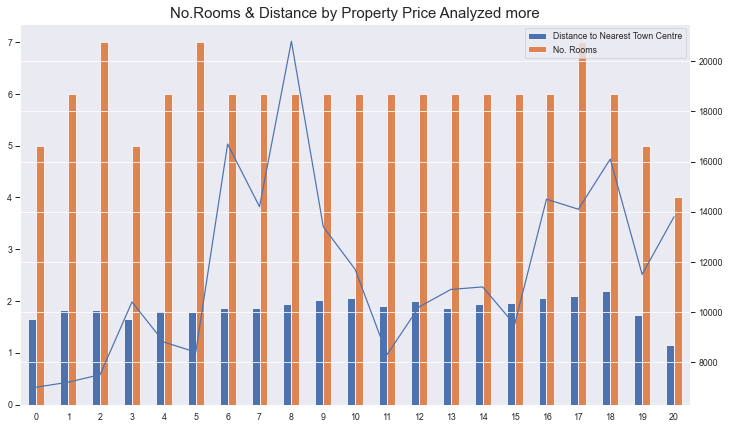

In [22]:
#Analyzing the chart above more
ax = data['Property Price'].plot(secondary_y=True)
data[['Distance to Nearest Town Centre','No. Rooms']].plot(kind='bar', ax=ax, title='No.Rooms & Distance by Property Price Analyzed more')




---

---

---

# <span style='background:pink'>  No. Rooms and Distance of Properties

### <span style='color:blue'> Here we analyze more each property's No. Rooms and the Distance of the property to the Closest Town Centre. We notice that the most properties have 6 and 7 No. Rooms and the distance of those properties are more than 1.7km

[Text(0.5, 1.0, 'Properties with No. Rooms & their Distance from Town Centre')]

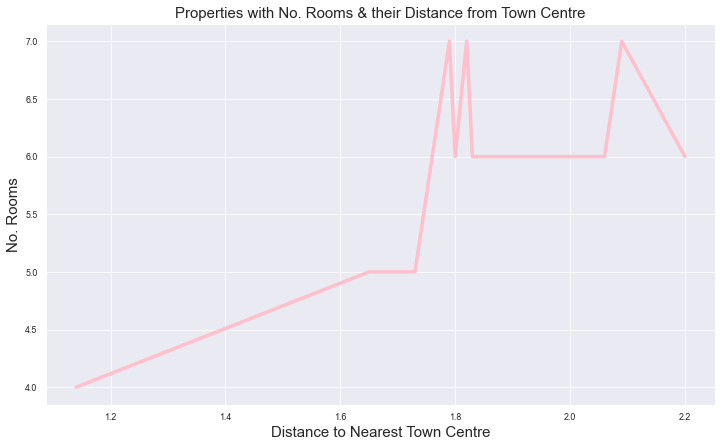

In [23]:

sns.lineplot(data=data, x="Distance to Nearest Town Centre", y="No. Rooms", linewidth=3.5, color='pink').set(title='Properties with No. Rooms & their Distance from Town Centre')

---

---

---

In [27]:
data["Price Estimation From Analyst"] = (data["No. Rooms"] / data["Age of Property"] * data["Distance to Nearest Town Centre"])*100000

In [33]:
data.head()

,TOWN/VILLAGE,No. Rooms,Age of Property,Distance to Nearest Town Centre,Property Tax per year,No. pupils per teacher,Property Price,Price Estimation From Analyst
0,Boston Roxbury,5,100,1.66,466.20,20,7000,8300.000000
1,Boston Roxbury,6,100,1.83,479.52,20,7200,10980.000000
2,Boston Roxbury,7,91,1.82,499.50,20,7500,14000.000000
3,Boston Roxbury,5,89,1.65,692.64,20,10400,9269.662921
4,Boston Roxbury,6,100,1.80,586.08,20,8800,10800.000000


In [34]:
print(data)

        TOWN/VILLAGE  No. Rooms  Age of Property  Distance to Nearest Town Centre  Property Tax per year  \
0     Boston Roxbury          5              100                             1.66                 466.20   
1     Boston Roxbury          6              100                             1.83                 479.52   
2     Boston Roxbury          7               91                             1.82                 499.50   
3     Boston Roxbury          5               89                             1.65                 692.64   
4     Boston Roxbury          6              100                             1.80                 586.08   
5     Boston Roxbury          7               77                             1.79                 559.44   
6     Boston Roxbury          6              100                             1.86                1112.22   
7        Boston west          6               95                             1.87                 945.72   
8        Boston west        

# <span style='background:yellow'> This is our estimation price of each Property ID (0-20)

In [35]:
data['Price Estimation From Analyst'].round(decimals = 1)

0      8300.0
1     10980.0
2     14000.0
3      9269.7
4     10800.0
5     16272.7
6     11160.0
7     11810.5
8     13295.5
9     14258.8
10    17408.5
11    12063.2
12    20000.0
13    14126.6
14    14923.1
15    12312.5
16    14302.3
17    15563.8
18    17600.0
19     8737.4
20     4560.0
Name: Price Estimation From Analyst, dtype: float64

In [37]:
data['Price Estimation From Analyst'] = data['Price Estimation From Analyst'].round(decimals = 1)

In [38]:
print(data)

        TOWN/VILLAGE  No. Rooms  Age of Property  Distance to Nearest Town Centre  Property Tax per year  \
0     Boston Roxbury          5              100                             1.66                 466.20   
1     Boston Roxbury          6              100                             1.83                 479.52   
2     Boston Roxbury          7               91                             1.82                 499.50   
3     Boston Roxbury          5               89                             1.65                 692.64   
4     Boston Roxbury          6              100                             1.80                 586.08   
5     Boston Roxbury          7               77                             1.79                 559.44   
6     Boston Roxbury          6              100                             1.86                1112.22   
7        Boston west          6               95                             1.87                 945.72   
8        Boston west        

---

---

---

# We noticed with our data visualization, charts, graphs and tables, that some of the Properties had a very low price, some of them very high and some were correctly estimated. 

# From the listed properties:
1. 7 of them had <span style='color:red'>Low/Very Low Price </span> 
2. 8 of them had <span style='color:green'>High/Very High Price </span>
3. 6 of them had almost Well Estimated Price

# Low Price Properties the <span style='color:green'>Advantages </span> are:
* This Property will be very popular in the Market
* This Property will be sold/rent very soon </span>

# Low Price Properties the <span style='color:red'>Disadvantages </span> are:
* Still many clients would buy/rent this Property in a Higher Price closer to the Estimated
* Losing Long Term Profits that the Estimated Price could make

# High Price Properties the <span style='color:green'>Advantages </span> are:
* Our Property Estate will make more money from the first month of rent or more money when Property sold

# High Price Properties the <span style='color:red'>Disadvantages </span> are:
* Will take longer time to sell or rent to any client this Property
* Will not be recommend to other people, that has as an effect not good marketing of our Estate




# This Project-Analyzing Data aim is to Predict how soon each Property will be sold, what is the Best Price for each Property to be sold according to the Rooms, Distance to Closest Centre, Pupils per Teacher and Age of each Property.

# After all visualization and analyzation we created a formula that we have faith in it and we ensure that each Property now has a better Estimated price. Only the Property with the ID 20 (the last one) is Very low and you can modify it up to double price because is the Closest to a Town Centre but less Rooms and Age of Property is very High.

# Additionally, with our estimated prices per property the agency can make MORE PROFIT. That happens because if all Properties are sold with the initial Price The Estate could make 240k in total. Now, if all Properties are sold with our Price Estimation the Estate could make approximately 271k. 

# <span style='background:yellow'> Our Property Estate will make more around 13% or 31k if you prefer the difference in amount of money.